# The main objective of the problem is to develop the machine learning approach to forecast the demand of car rentals on an hourly basis.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train=pd.read_csv('D:/Megha/Desktop/hackathon/train_E1GspfA.csv')
df_train

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81
...,...,...,...
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104


In [3]:
df_train.dtypes

date      object
hour       int64
demand     int64
dtype: object

In [4]:
df_train.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,73.991451
std,6.544963,41.678988
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,98.000000
max,23.000000,379.000000


In [5]:
df_train

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81
...,...,...,...
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104


In [6]:
df_train.date=pd.to_datetime(df_train['date'], format= '%Y/%m/%d')

In [7]:
df_train.dtypes

date      datetime64[ns]
hour               int64
demand             int64
dtype: object

In [8]:
df_train['year'] = pd.DatetimeIndex(df_train['date']).year
df_train['month'] = pd.DatetimeIndex(df_train['date']).month
df_train['day'] = pd.DatetimeIndex(df_train['date']).day
df_train

,date,hour,demand,year,month,day
0,2018-08-18,9,91,2018,8,18
1,2018-08-18,10,21,2018,8,18
2,2018-08-18,13,23,2018,8,18
3,2018-08-18,14,104,2018,8,18
4,2018-08-18,15,81,2018,8,18
...,...,...,...,...,...,...
18242,2021-02-28,19,95,2021,2,28
18243,2021-02-28,20,88,2021,2,28
18244,2021-02-28,21,39,2021,2,28
18245,2021-02-28,22,104,2021,2,28


# Basic visualisations to understand dataset

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

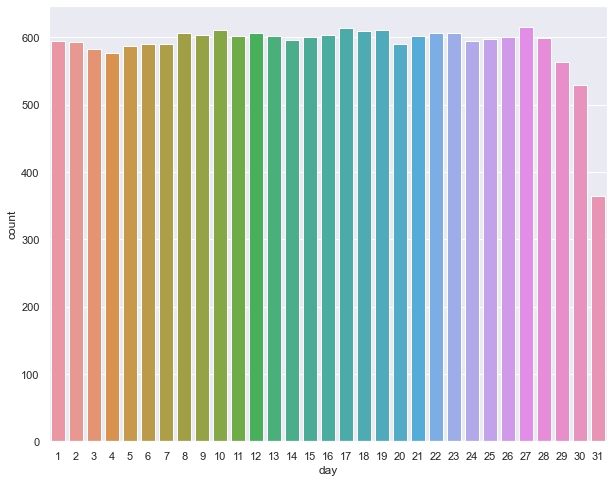

In [102]:
import seaborn as sns
sns.countplot(df_train.day)

In [10]:
#sales tend to decrease in the last 2-3 days of the month

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

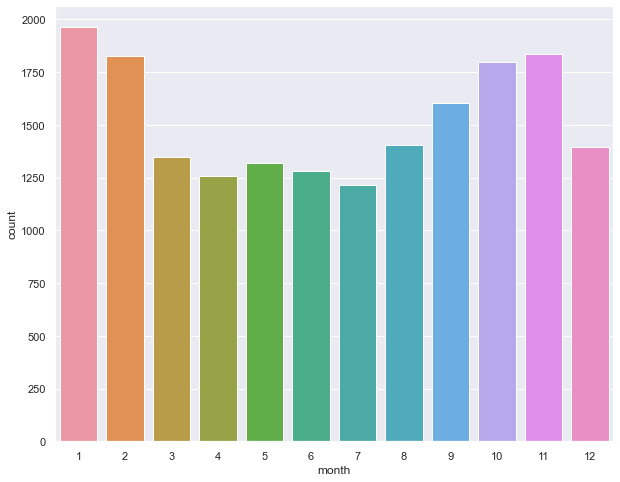

In [101]:
sns.countplot(df_train.month)

In [12]:
#sales tend to decrease in the first and second quarter of the year with lowest sales in july

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

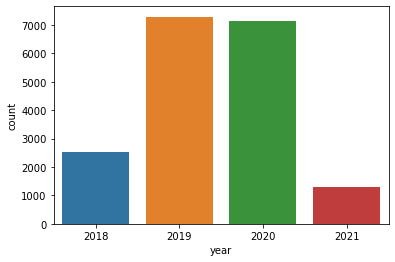

In [13]:
sns.countplot(df_train.year)

In [14]:
#sales have reduced in the last year

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='count'>

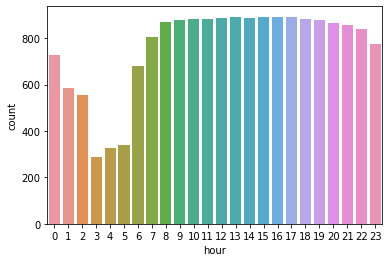

In [15]:
sns.countplot(df_train.hour)

In [16]:
#peak sale hours are between 8am to 12 am. Least sales occur at 3 am.

In [17]:
#df_train.drop(['date'],axis=1,inplace=True)
#df_train

<AxesSubplot:xlabel='hour', ylabel='demand'>

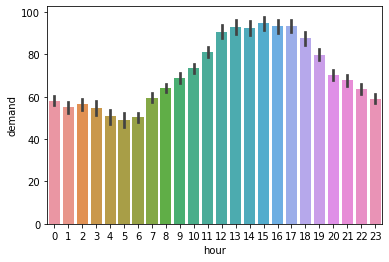

In [18]:
sns.barplot(x='hour', y='demand',data=df_train)

In [19]:
#sales tend to increase after 8 am and decrease after 5pm

# Outlier Detection

In [20]:
df_train.skew()

C:\Users\Megha\AppData\Local\Temp/ipykernel_17504/1035533876.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.skew()


hour     -0.240621
demand    1.128438
year     -0.036972
month    -0.054793
day       0.000512
dtype: float64

In [21]:
df_train.kurt()

C:\Users\Megha\AppData\Local\Temp/ipykernel_17504/1993696817.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.kurt()


hour     -0.933764
demand    3.300549
year     -0.553490
month    -1.348367
day      -1.184877
dtype: float64

In [22]:
#sns.distplot(df_train.datetime)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='demand', ylabel='Density'>

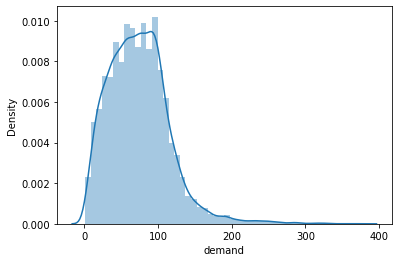

In [23]:
sns.distplot(df_train.demand)

In [24]:
df_train.isnull()

,date,hour,demand,year,month,day
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
18242,False,False,False,False,False,False
18243,False,False,False,False,False,False
18244,False,False,False,False,False,False
18245,False,False,False,False,False,False


In [25]:
df_train.isnull().sum()

date      0
hour      0
demand    0
year      0
month     0
day       0
dtype: int64

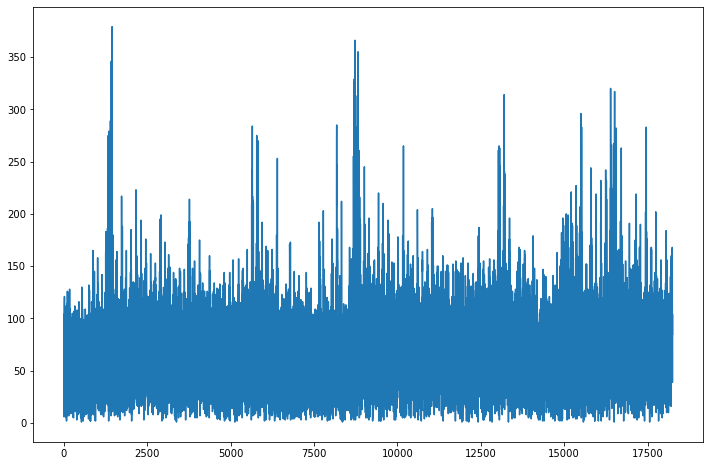

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(df_train['demand'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='demand'>

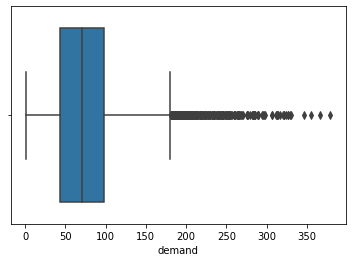

In [27]:
sns.boxplot(df_train.demand)

In [28]:
#outliers are present in demand

In [29]:
from scipy import stats
z=np.abs(stats.zscore(df_train.demand))
print(z)

0        0.408096
1        1.271454
2        1.223467
3        0.720012
4        0.168160
           ...   
18242    0.504070
18243    0.336115
18244    0.839570
18245    0.720012
18246    0.264134
Name: demand, Length: 18247, dtype: float64


In [30]:
threshold=3
print(np.where(z>3))

(array([ 1331,  1333,  1334,  1352,  1354,  1356,  1357,  1358,  1359,
        1360,  1376,  1377,  1378,  1380,  1381,  1382,  1396,  1397,
        1398,  1399,  1400,  1401,  1402,  1403,  1419,  1420,  1421,
        1422,  1423,  1424,  1425,  1426,  1428,  1429,  1445,  1446,
        1447,  1448,  1449,  1450,  1451,  1733,  2165,  3767,  5633,
        5638,  5651,  5652,  5653,  5654,  5657,  5660,  5672,  5674,
        5677,  5682,  5784,  5796,  5797,  5798,  5804,  5817,  5818,
        5820,  5821,  6402,  7780,  8178,  8179,  8180,  8181,  8182,
        8183,  8184,  8325,  8683,  8686,  8688,  8701,  8702,  8704,
        8705,  8706,  8707,  8708,  8709,  8710,  8711,  8727,  8728,
        8729,  8730,  8731,  8732,  8733,  8751,  8752,  8753,  8754,
        8755,  8756,  8757,  8773,  8776,  8778,  8779,  8780,  8794,
        8795,  8796,  8797,  8798,  8799,  8800,  8801,  8817,  8818,
        8819,  8820,  8821,  8822,  8823,  8824,  8825,  8827,  8842,
        8843,  8844

In [31]:
outlier=df_train.iloc[[1331,  1333,  1334,  1352,  1354,  1356,  1357,  1358,  1359,
        1360,  1376,  1377,  1378,  1380,  1381,  1382,  1396,  1397,
        1398,  1399,  1400,  1401,  1402,  1403,  1419,  1420,  1421,
        1422,  1423,  1424,  1425,  1426,  1428,  1429,  1445,  1446,
        1447,  1448,  1449,  1450,  1451,  1733,  2165,  3767,  5633,
        5638,  5651,  5652,  5653,  5654,  5657,  5660,  5672,  5674,
        5677,  5682,  5784,  5796,  5797,  5798,  5804,  5817,  5818,
        5820,  5821,  6402,  7780,  8178,  8179,  8180,  8181,  8182,
        8183,  8184,  8325,  8683,  8686,  8688,  8701,  8702,  8704,
        8705,  8706,  8707,  8708,  8709,  8710,  8711,  8727,  8728,
        8729,  8730,  8731,  8732,  8733,  8751,  8752,  8753,  8754,
        8755,  8756,  8757,  8773,  8776,  8778,  8779,  8780,  8794,
        8795,  8796,  8797,  8798,  8799,  8800,  8801,  8817,  8818,
        8819,  8820,  8821,  8822,  8823,  8824,  8825,  8827,  8842,
        8843,  8844,  8869,  9008,  9010,  9013,  9435,  9574, 10179,
       10180, 10182, 10600, 11049, 13029, 13041, 13042, 13043, 13044,
       13045, 13050, 13064, 13065, 13066, 13073, 13184, 13199, 13200,
       13201, 13202, 13203, 13208, 13223, 13226, 15059, 15211, 15355,
       15356, 15481, 15499, 15501, 15502, 15521, 15522, 15523, 15797,
       15798, 15952, 16097, 16243, 16244, 16264, 16265, 16269, 16389,
       16391, 16392, 16393, 16394, 16412, 16413, 16414, 16416, 16417,
       16418, 16441, 16460, 16461, 16464, 16483, 16484, 16485, 16487,
       16507, 16508, 16510, 16511, 16512, 16513, 16529, 16530, 16531,
       16533, 16534, 16535, 16553, 16555, 16556, 16557, 16558, 16708,
       16710, 16711, 17154, 17157, 17440, 17459, 17460, 17461, 17462,
       17463, 17745]]
outlier

,date,hour,demand,year,month,day
1331,2018-11-05,14,232,2018,11,5
1333,2018-11-05,16,207,2018,11,5
1334,2018-11-05,17,275,2018,11,5
1352,2018-11-06,12,238,2018,11,6
1354,2018-11-06,14,207,2018,11,6
...,...,...,...,...,...,...
17460,2021-01-24,13,283,2021,1,24
17461,2021-01-24,14,233,2021,1,24
17462,2021-01-24,15,253,2021,1,24
17463,2021-01-24,16,225,2021,1,24


In [32]:
# % of outliers
(227/18247)*100

1.2440401161834822

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

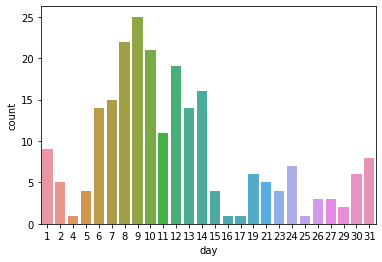

In [33]:
sns.countplot(outlier.day)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

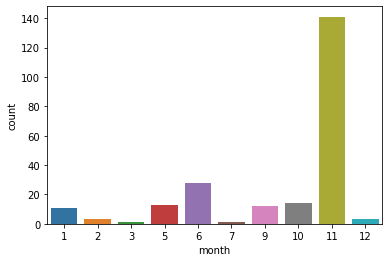

In [34]:
sns.countplot(outlier.month)

In [35]:
#large outlier data is for the first 2 weeks of november

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

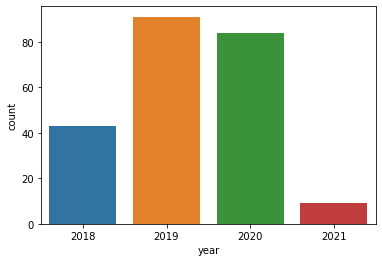

In [36]:
sns.countplot(outlier.year)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='count'>

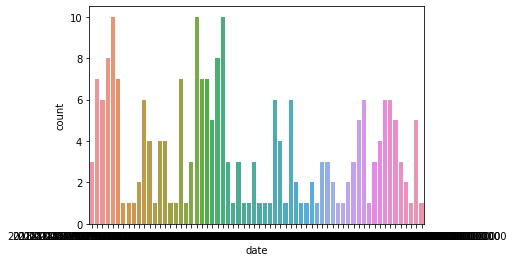

In [37]:
sns.countplot(outlier.date)

<AxesSubplot:xlabel='hour', ylabel='demand'>

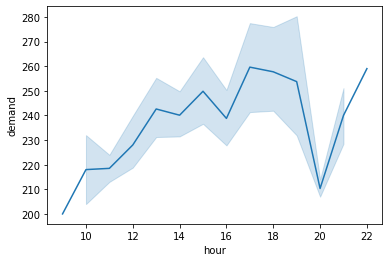

In [38]:
sns.lineplot(x='hour',y='demand',data=outlier)

In [39]:
outlier.max()

date      2021-02-06 00:00:00
hour                       22
demand                    379
year                     2021
month                      12
day                        31
dtype: object

In [40]:
outlier.min()

date      2018-11-05 00:00:00
hour                        9
demand                    200
year                     2018
month                       1
day                         1
dtype: object

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='count'>

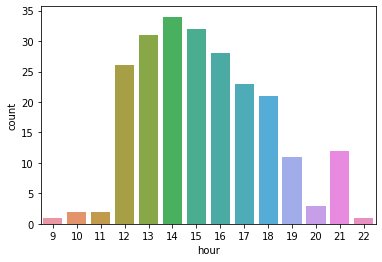

In [41]:
sns.countplot(outlier.hour)

In [42]:
#To deal with outlier, can replace values with max value

In [43]:
inlier=df_train[df_train.demand < 200]
inlier

,date,hour,demand,year,month,day
0,2018-08-18,9,91,2018,8,18
1,2018-08-18,10,21,2018,8,18
2,2018-08-18,13,23,2018,8,18
3,2018-08-18,14,104,2018,8,18
4,2018-08-18,15,81,2018,8,18
...,...,...,...,...,...,...
18242,2021-02-28,19,95,2021,2,28
18243,2021-02-28,20,88,2021,2,28
18244,2021-02-28,21,39,2021,2,28
18245,2021-02-28,22,104,2021,2,28


In [44]:
inlier.max()

date      2021-02-28 00:00:00
hour                       23
demand                    199
year                     2021
month                      12
day                        31
dtype: object

In [45]:
#in dataframe, replace all demand values>180 with 180

In [46]:
df_model=df_train
df_model

,date,hour,demand,year,month,day
0,2018-08-18,9,91,2018,8,18
1,2018-08-18,10,21,2018,8,18
2,2018-08-18,13,23,2018,8,18
3,2018-08-18,14,104,2018,8,18
4,2018-08-18,15,81,2018,8,18
...,...,...,...,...,...,...
18242,2021-02-28,19,95,2021,2,28
18243,2021-02-28,20,88,2021,2,28
18244,2021-02-28,21,39,2021,2,28
18245,2021-02-28,22,104,2021,2,28


In [47]:
df_model.demand.loc[df_model.demand > 180]  = 180

C:\Users\Megha\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [48]:
df_model.max()

date      2021-02-28 00:00:00
hour                       23
demand                    180
year                     2021
month                      12
day                        31
dtype: object

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='demand', ylabel='Density'>

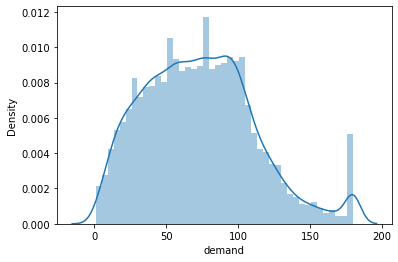

In [49]:
sns.distplot(df_model.demand)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='demand'>

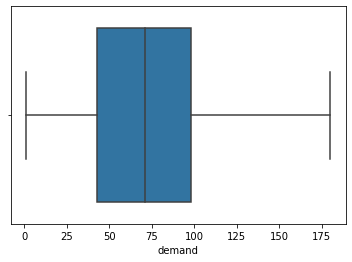

In [50]:
sns.boxplot(df_model.demand)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour'>

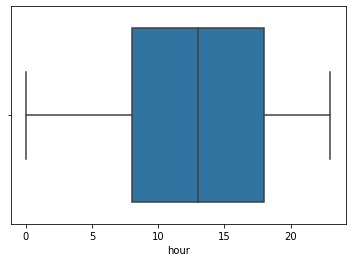

In [51]:
sns.boxplot(df_train.hour)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

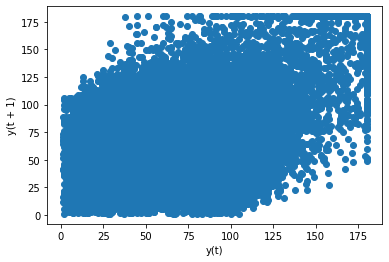

In [52]:
from pandas.plotting import lag_plot
lag_plot(df_model['demand'])

<AxesSubplot:xlabel='hour', ylabel='demand'>

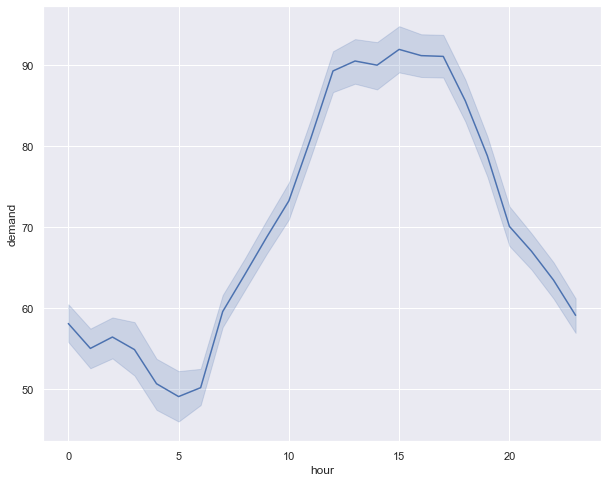

In [53]:
sns.set(rc={"figure.figsize":(10,8)})
sns.lineplot(x='hour',y='demand',data=df_model)

<AxesSubplot:xlabel='hour', ylabel='demand'>

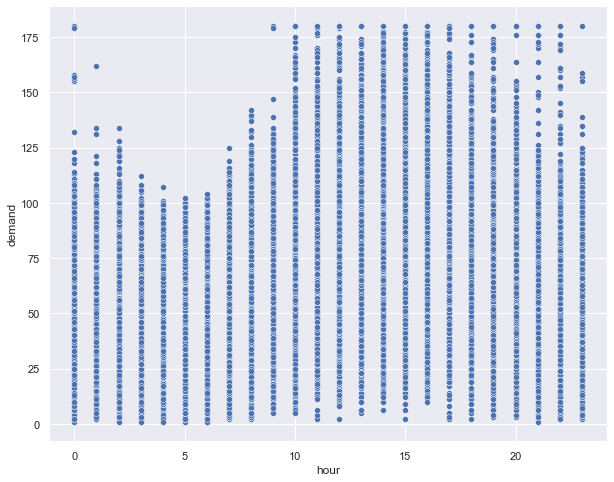

In [54]:
sns.scatterplot(x='hour',y='demand',data=df_model)

<AxesSubplot:xlabel='month', ylabel='hour'>

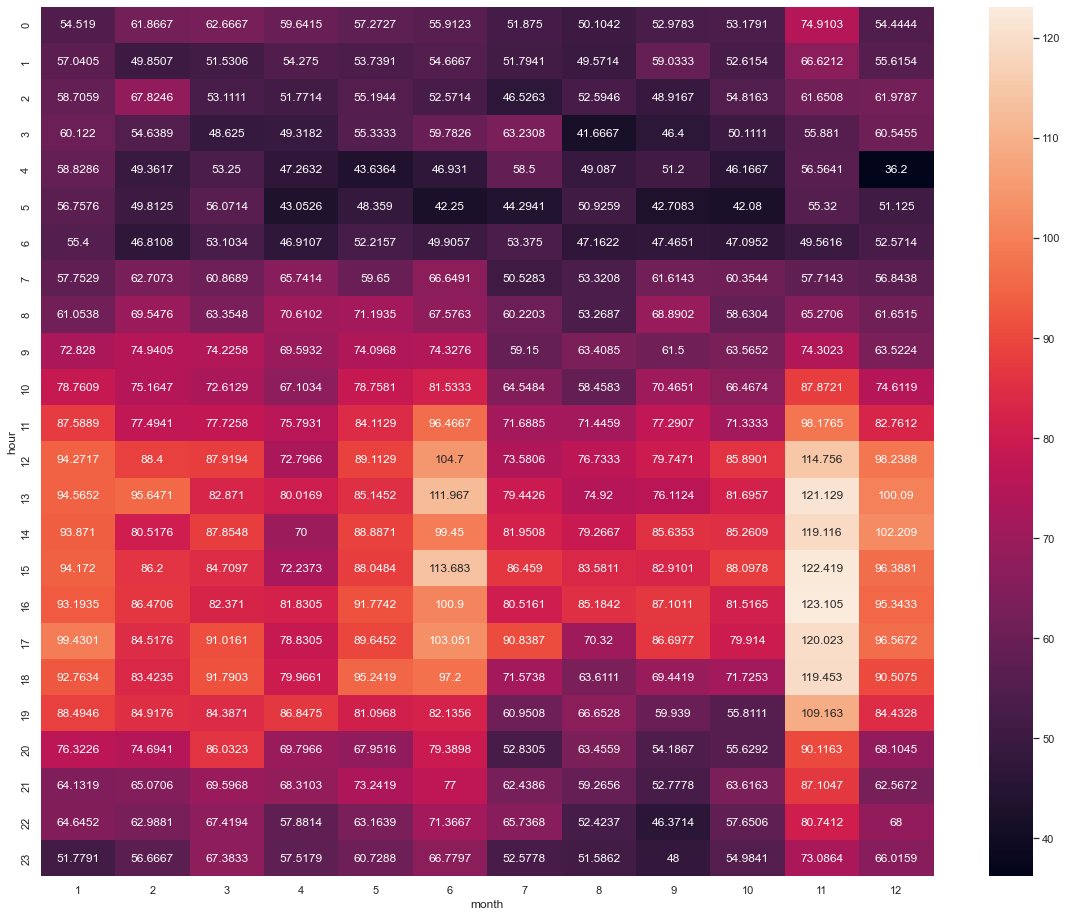

In [55]:
plt.figure(figsize=(20,16))
heat_map=pd.pivot_table(data=df_model,values='demand',index='hour',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(heat_map,annot=True,fmt='g')

In [56]:
#sales for most days is similar except for the last 2-3 days whereas monthly sales shows more deviation, hence monthwise hourly sales is displayed above

# Model Building

In [57]:
df_model['hour'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'],inplace=True)

In [58]:
df_model

,date,hour,demand,year,month,day
0,2018-08-18,9am,91,2018,8,18
1,2018-08-18,10am,21,2018,8,18
2,2018-08-18,1pm,23,2018,8,18
3,2018-08-18,2pm,104,2018,8,18
4,2018-08-18,3pm,81,2018,8,18
...,...,...,...,...,...,...
18242,2021-02-28,7pm,95,2021,2,28
18243,2021-02-28,8pm,88,2021,2,28
18244,2021-02-28,9pm,39,2021,2,28
18245,2021-02-28,10pm,104,2021,2,28


In [59]:
hour_dummy=pd.DataFrame(pd.get_dummies(df_model['hour']))
df_model = pd.concat([df_model,hour_dummy],axis = 1)
df_model

,date,hour,demand,year,month,day,10am,10pm,11am,11pm,...,5am,5pm,6am,6pm,7am,7pm,8am,8pm,9am,9pm
0,2018-08-18,9am,91,2018,8,18,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2018-08-18,10am,21,2018,8,18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018-08-18,1pm,23,2018,8,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-08-18,2pm,104,2018,8,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-08-18,3pm,81,2018,8,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,2021-02-28,7pm,95,2021,2,28,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18243,2021-02-28,8pm,88,2021,2,28,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18244,2021-02-28,9pm,39,2021,2,28,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,2021-02-28,10pm,104,2021,2,28,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df_model=df_model.drop(['date','hour'],axis=1)
df_model

,demand,year,month,day,10am,10pm,11am,11pm,12am,12pm,...,5am,5pm,6am,6pm,7am,7pm,8am,8pm,9am,9pm
0,91,2018,8,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,21,2018,8,18,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,2018,8,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,104,2018,8,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,81,2018,8,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,95,2021,2,28,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18243,88,2021,2,28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18244,39,2021,2,28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,104,2021,2,28,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Time series decomposition plot

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

C:\Users\Megha\AppData\Local\Temp/ipykernel_17504/1179802000.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  dec_ts=seasonal_decompose(df_model.demand,freq=10)


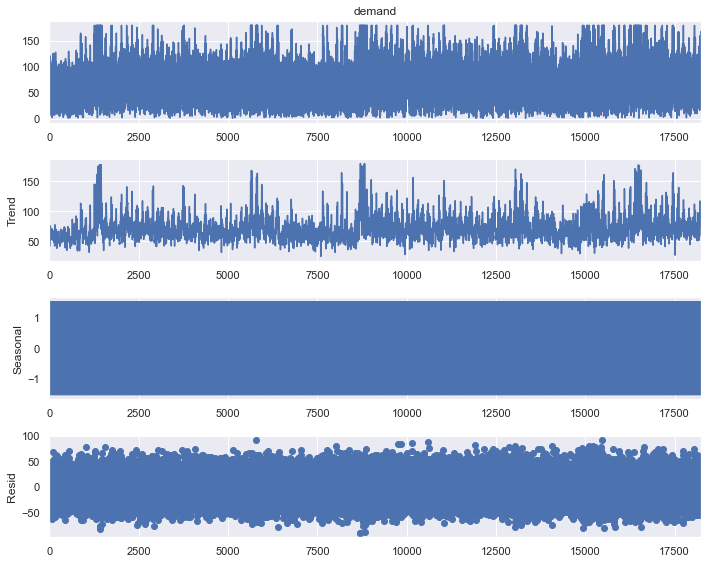

In [62]:
# Time series decomposition plot
dec_ts=seasonal_decompose(df_model.demand,freq=10)
dec_ts.plot()
plt.show()

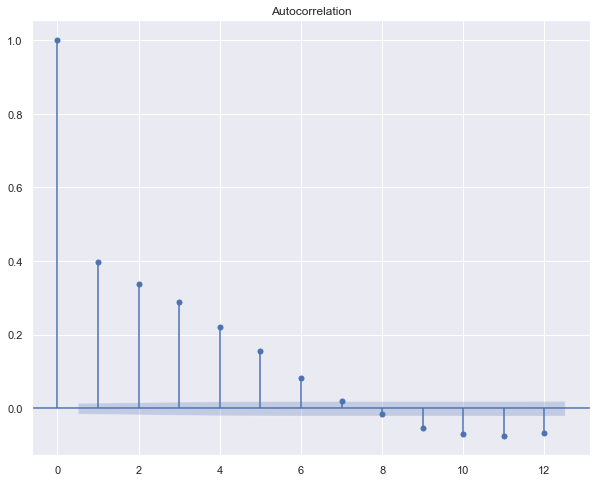

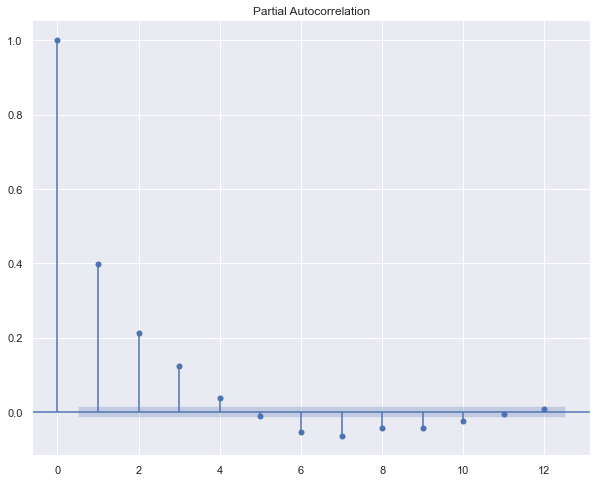

In [63]:
#ACF and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df_model.demand,lags=12)
tsa_plots.plot_pacf(df_model.demand,lags=12)
plt.show()

# Data Based Forecasting

In [64]:
df_model_train=df_model.head(12773)
df_model_train

,demand,year,month,day,10am,10pm,11am,11pm,12am,12pm,...,5am,5pm,6am,6pm,7am,7pm,8am,8pm,9am,9pm
0,91,2018,8,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,21,2018,8,18,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,2018,8,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,104,2018,8,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,81,2018,8,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12768,54,2020,5,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12769,26,2020,5,17,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12770,24,2020,5,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12771,80,2020,5,18,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df_model_test=df_model.tail(5474)
df_model_test

,demand,year,month,day,10am,10pm,11am,11pm,12am,12pm,...,5am,5pm,6am,6pm,7am,7pm,8am,8pm,9am,9pm
12773,51,2020,5,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12774,2,2020,5,18,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12775,84,2020,5,18,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12776,88,2020,5,18,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12777,70,2020,5,18,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,95,2021,2,28,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18243,88,2021,2,28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18244,39,2021,2,28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,104,2021,2,28,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(org,pred):
    temp=sqrt(mean_squared_error(org, pred)) 
    return temp

# Simple exponential method

In [67]:
ses_model=SimpleExpSmoothing(df_model_train['demand']).fit()
pred_ses=ses_model.predict(start=df_model_test.index[0],end=df_model_test.index[-1])
rmse(df_model_test.demand,pred_ses)

C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


49.2387734568751

# Holt Method

In [68]:
hw=Holt(df_model_train['demand']).fit()
prd_hw=hw.predict(start=df_model_test.index[0],end=df_model_test.index[-1])
rmse(df_model_test.demand,prd_hw)

C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


3408.99484879765

# Holt winters exponential smoothing with additive seasonality and additive trend

In [69]:
hwa=ExponentialSmoothing(df_model_train['demand'],seasonal='add',trend='add',seasonal_periods=16).fit()
pred_hwa=hwa.predict(start=df_model_test.index[0],end=df_model_test.index[-1])
rmse(df_model_test.demand,pred_hwa)

C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


129.6791526811503

# Holt winters exponential smoothing with multiplicative seasonality and additive trend

In [70]:
hwm=ExponentialSmoothing(df_model_train['demand'],seasonal='mul',trend='add',seasonal_periods=16).fit()
pred_hwm=hwm.predict(start=df_model_test.index[0],end=df_model_test.index[-1])
rmse(df_model_test.demand,pred_hwm)

C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


1060.736402881562

In [71]:
# Simple exponential smoothing has the lowest rmse among the data driven models

# Model Based Forecasting

In [72]:
df_model_train['t']=np.arange(1,12774)
df_model_train['t_sq']=df_model_train['t']*df_model_train['t']
df_model_train['log_dem']=np.log(df_model_train['demand'])
df_model_train

C:\Users\Megha\AppData\Local\Temp/ipykernel_17504/404885237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_train['t']=np.arange(1,12774)
C:\Users\Megha\AppData\Local\Temp/ipykernel_17504/404885237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_train['t_sq']=df_model_train['t']*df_model_train['t']
C:\Users\Megha\AppData\Local\Temp/ipykernel_17504/404885237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,demand,year,month,day,10am,10pm,11am,11pm,12am,12pm,...,6pm,7am,7pm,8am,8pm,9am,9pm,t,t_sq,log_dem
0,91,2018,8,18,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,4.510860
1,21,2018,8,18,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,3.044522
2,23,2018,8,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,3.135494
3,104,2018,8,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.644391
4,81,2018,8,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,4.394449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12768,54,2020,5,17,0,0,0,0,0,0,...,0,0,0,0,0,0,1,12769,163047361,3.988984
12769,26,2020,5,17,0,1,0,0,0,0,...,0,0,0,0,0,0,0,12770,163072900,3.258097
12770,24,2020,5,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,12771,163098441,3.178054
12771,80,2020,5,18,0,0,0,0,1,0,...,0,0,0,0,0,0,0,12772,163123984,4.382027


In [73]:
df_model_test['t']=np.arange(1,5475)
df_model_test['t_sq']=df_model_test['t']*df_model_test['t']
df_model_test['log_dem']=np.log(df_model_test['demand'])
df_model_test

C:\Users\Megha\AppData\Local\Temp/ipykernel_17504/2775654197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_test['t']=np.arange(1,5475)
C:\Users\Megha\AppData\Local\Temp/ipykernel_17504/2775654197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_test['t_sq']=df_model_test['t']*df_model_test['t']
C:\Users\Megha\AppData\Local\Temp/ipykernel_17504/2775654197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,demand,year,month,day,10am,10pm,11am,11pm,12am,12pm,...,6pm,7am,7pm,8am,8pm,9am,9pm,t,t_sq,log_dem
12773,51,2020,5,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,3.931826
12774,2,2020,5,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,0.693147
12775,84,2020,5,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.430817
12776,88,2020,5,18,0,0,0,0,0,0,...,0,1,0,0,0,0,0,4,16,4.477337
12777,70,2020,5,18,0,0,0,0,0,0,...,0,0,0,1,0,0,0,5,25,4.248495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,95,2021,2,28,0,0,0,0,0,0,...,0,0,1,0,0,0,0,5470,29920900,4.553877
18243,88,2021,2,28,0,0,0,0,0,0,...,0,0,0,0,1,0,0,5471,29931841,4.477337
18244,39,2021,2,28,0,0,0,0,0,0,...,0,0,0,0,0,0,1,5472,29942784,3.663562
18245,104,2021,2,28,0,1,0,0,0,0,...,0,0,0,0,0,0,0,5473,29953729,4.644391


# Linear Model

In [74]:
import statsmodels.formula.api as smf
lm=smf.ols('demand~t',data=df_model_train).fit()
pred_lm=pd.Series(lm.predict(pd.DataFrame(df_model_test['t'])))
rmse(df_model_test.demand,pred_lm)

40.93959544255993

# exp model

In [75]:
exp=smf.ols('log_dem~t',data=df_model_train).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(df_model_test['t'])))
rmse(df_model_test.demand,pred_exp)

82.94180814898141

# quadratic model

In [76]:
quad=smf.ols('demand~t_sq',data=df_model_train).fit()
pred_quad=pd.Series(quad.predict(pd.DataFrame(df_model_test['t_sq'])))
rmse(df_model_test.demand,pred_quad)

40.90149976764869

# additive seasonality model

In [77]:
from sklearn import linear_model
regr1 = linear_model.LinearRegression()
x = np.asanyarray(df_model_train[['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']])
y = np.asanyarray(df_model_train[['demand']])
regr1.fit(x,y)
pred_add_sea = regr1.predict(df_model_test[['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']])
rmse(df_model_test.demand,pred_add_sea)

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


37.089281771265796

# additive quad seasonality model

In [84]:
regr = linear_model.LinearRegression()
x1 = np.asanyarray(df_model_train[['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm','t','t_sq']])
y1 = np.asanyarray(df_model_train[['demand']])
regr.fit(x1,y1)
pred_add_sea_quad = regr.predict(df_model_test[['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm','t','t_sq']])
rmse(df_model_test.demand,pred_add_sea_quad)

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


37.427317885857626

# multiplicative seasonality model

In [85]:
x2 = np.asanyarray(df_model_train[['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']])
y2 = np.asanyarray(df_model_train[['log_dem']])
regr.fit(x2,y2)
pred_mul_sea = regr.predict(df_model_test[['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']])
rmse(df_model_test.demand,pred_mul_sea)

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


82.89191601746789

# multiplicative additive seasonality model

In [86]:
x3 = np.asanyarray(df_model_train[['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm','t','t_sq']])
y3 = np.asanyarray(df_model_train[['log_dem']])
regr.fit(x3,y3)
pred_mul_add_sea = regr.predict(df_model_test[['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm','t','t_sq']])
rmse(df_model_test.demand,pred_mul_add_sea)

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


82.92180181298359

additive seasonality model has least rmse among model based forecasting models

# Comparing RMSE for all models, Additive Seasonality Model has lowest RMSE.

 # Predicting demand on hourly basis based on additive seasonality model

In [87]:
test=pd.read_csv('D:/Megha/Desktop/hackathon/test_6QvDdzb.csv')
test

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5
...,...,...
7645,2022-03-28,19
7646,2022-03-28,20
7647,2022-03-28,21
7648,2022-03-28,22


In [88]:
test['hour'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'],inplace=True)
test

,date,hour
0,2021-03-01,12am
1,2021-03-01,1am
2,2021-03-01,2am
3,2021-03-01,3am
4,2021-03-01,5am
...,...,...
7645,2022-03-28,7pm
7646,2022-03-28,8pm
7647,2022-03-28,9pm
7648,2022-03-28,10pm


In [89]:
hour_dummy=pd.DataFrame(pd.get_dummies(test['hour']))
test_model = pd.concat([test,hour_dummy],axis = 1)
test_model

,date,hour,10am,10pm,11am,11pm,12am,12pm,1am,1pm,...,5am,5pm,6am,6pm,7am,7pm,8am,8pm,9am,9pm
0,2021-03-01,12am,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-03-01,1am,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-03-01,2am,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-03-01,3am,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-03-01,5am,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7645,2022-03-28,7pm,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7646,2022-03-28,8pm,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7647,2022-03-28,9pm,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7648,2022-03-28,10pm,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
test_model['t']=np.arange(1,7651)
test_model['t_sq']=test_model['t']*test_model['t']
test_model

,date,hour,10am,10pm,11am,11pm,12am,12pm,1am,1pm,...,6am,6pm,7am,7pm,8am,8pm,9am,9pm,t,t_sq
0,2021-03-01,12am,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2021-03-01,1am,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,4
2,2021-03-01,2am,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,9
3,2021-03-01,3am,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,16
4,2021-03-01,5am,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7645,2022-03-28,7pm,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,7646,58461316
7646,2022-03-28,8pm,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,7647,58476609
7647,2022-03-28,9pm,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,7648,58491904
7648,2022-03-28,10pm,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7649,58507201


In [91]:
pred_add_sea = regr1.predict(test_model[['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']])

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Final Predicted Hourly Demand

In [92]:
pred_demand=pd.DataFrame(pred_add_sea)
test['demand']=pred_demand.round(0)
test

,date,hour,demand
0,2021-03-01,12am,59.0
1,2021-03-01,1am,56.0
2,2021-03-01,2am,57.0
3,2021-03-01,3am,54.0
4,2021-03-01,5am,50.0
...,...,...,...
7645,2022-03-28,7pm,78.0
7646,2022-03-28,8pm,70.0
7647,2022-03-28,9pm,67.0
7648,2022-03-28,10pm,64.0


In [93]:
test.to_csv(r'D:\Megha\Desktop\hackathon\final submission.csv')

# Visualization of predicted data

In [94]:
test['year'] = pd.DatetimeIndex(test['date']).year
test['month'] = pd.DatetimeIndex(test['date']).month
test['day'] = pd.DatetimeIndex(test['date']).day
test

,date,hour,demand,year,month,day
0,2021-03-01,12am,59.0,2021,3,1
1,2021-03-01,1am,56.0,2021,3,1
2,2021-03-01,2am,57.0,2021,3,1
3,2021-03-01,3am,54.0,2021,3,1
4,2021-03-01,5am,50.0,2021,3,1
...,...,...,...,...,...,...
7645,2022-03-28,7pm,78.0,2022,3,28
7646,2022-03-28,8pm,70.0,2022,3,28
7647,2022-03-28,9pm,67.0,2022,3,28
7648,2022-03-28,10pm,64.0,2022,3,28


C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

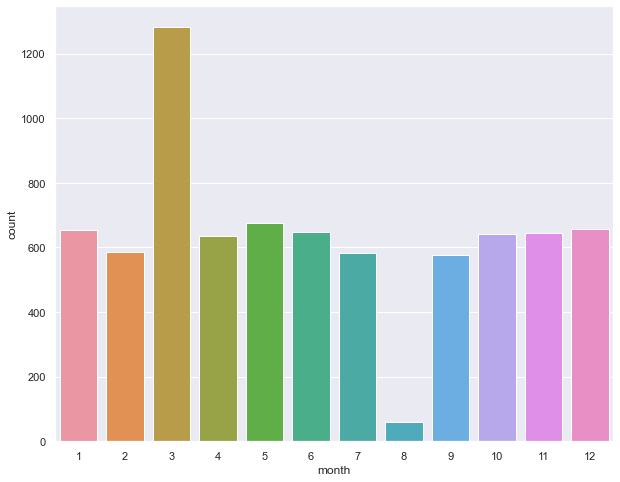

In [95]:
sns.countplot(test.month)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

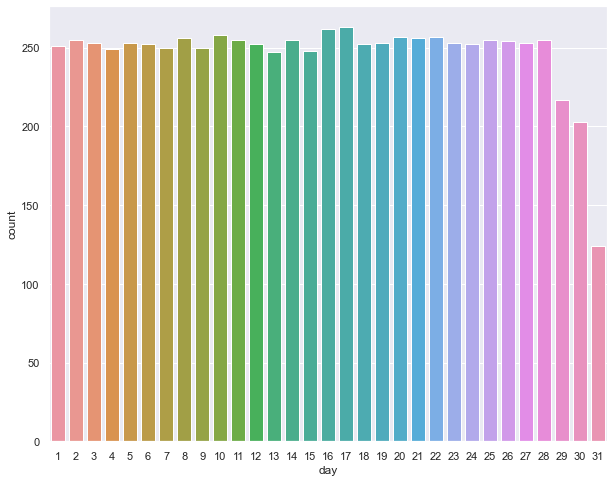

In [96]:
sns.countplot(test.day)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='demand', ylabel='count'>

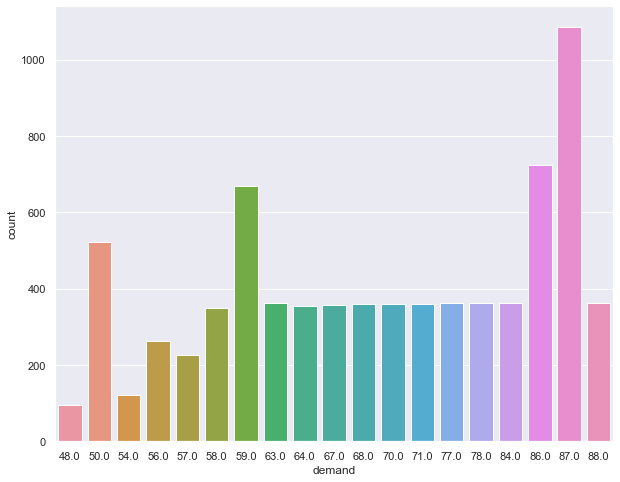

In [97]:
sns.countplot(test.demand)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='count'>

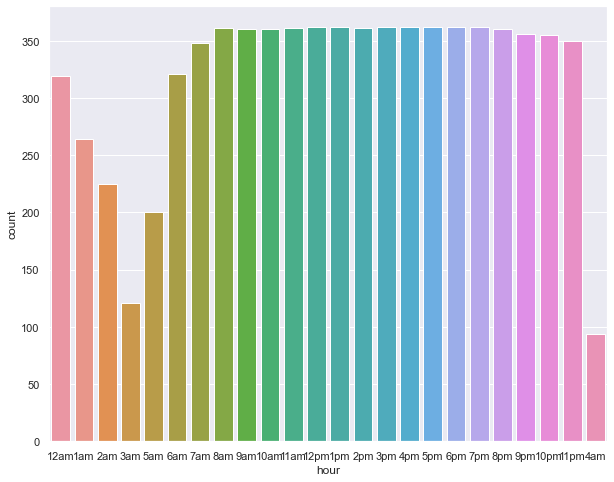

In [98]:
sns.countplot(test.hour)